# Naive Bayes Text Classification

Below we will perform a "Bag of Words" style classification of text documents. Our goal is to train a classifier that can accurately predict whether newsgroup posts come from a newgroup about baseball or a newsgroup about hockey. 

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math # For isNan

%matplotlib inline

#Input Files
trainFile1 = "C:/Users/Kycool13/Documents/GitHub/Naive_Bayes_Classifier/baseball_train_set.csv"
baseball_train_set = pd.read_csv(trainFile1,header=None)

trainFile2 = "C:/Users/Kycool13/Documents/GitHub/Naive_Bayes_Classifier/hockey_train_set.csv"
hockey_train_set = pd.read_csv(trainFile2,header=None)

testFile1 = "C:/Users/Kycool13/Documents/GitHub/Naive_Bayes_Classifier/baseball_test_set.csv"
baseball_test_set = pd.read_csv(testFile1,header=None)

testFile2 = "C:/Users/Kycool13/Documents/GitHub/Naive_Bayes_Classifier/hockey_test_set.csv"
hockey_test_set = pd.read_csv(testFile2,header=None)

#Input Size matrix of 50 x 5822
nrows = 50
ncolumns = 5822

def Naive_Bayes(beta, num_train):
    #Beta is 0 when we are calculating the MLE Estimate

    #Turn training data into ndarrays
    baseball_train_set_nd = baseball_train_set.values
    hockey_train_set_nd = hockey_train_set.values
    
    #Dirichlet prior parameters = beta
    baseball_count_np = beta * np.ones((1,ncolumns))
    hockey_count_np = beta * np.ones((1,ncolumns))
    
    #Sum the training set up to the number desired to train, then add to count
    baseball_count_np =  baseball_count_np + sum(baseball_train_set_nd[0:num_train,0:])
    hockey_count_np =  hockey_count_np + sum(hockey_train_set_nd[0:num_train, 0:])
    
    #Divide the count by the sum of the count, then take the log.
    #We use log as the probablilites fall between [0,1] and log is monotonic on [0,1]
    log_baseball = np.log(baseball_count_np[0:] / baseball_count_np.sum(axis=1))
    log_hockey = np.log(hockey_count_np[0:] / hockey_count_np.sum(axis=1))
    
    #Create arrays of -1s for predictions                        
    baseball_predictions = -1 * np.ones((1, nrows))
    hockey_predictions = -1 * np.ones((1, nrows))
    
    baseball_test_set_nd = baseball_test_set.values
    hockey_test_set_nd = hockey_test_set.values
    
    #Predict the baseball posts
    for i in range (0,50):
        baseball_prob = 0;
        hockey_prob = 0;
    
        for j in range(0, 5822):
                 
                #We defined 0 = 0 * log(0)
                b_term = baseball_test_set_nd[i,j] * log_baseball[0,j];
                h_term = baseball_test_set_nd[i,j] * log_hockey[0,j];
                
                #If the value is not a nan, then we'll add it to the probability
                if ~np.isnan(b_term).any():
                    baseball_prob = baseball_prob + b_term;
                    
                if ~np.isnan(h_term).any():
                    hockey_prob = hockey_prob + h_term;
        
        #If there's a tie, then predict baseball        
        if baseball_prob >= hockey_prob:
            baseball_predictions[0,i] = 1; #Positive prediction
        else:
            baseball_predictions[0,i] = 0; #Incorrect prediction
        
    #Predict the hockey posts
    for i in range (0,50):
        baseball_prob =0;
        hockey_prob = 0;
    
        for j in range(0, 5822):
        
                b_term = hockey_test_set_nd[i,j] * log_baseball[0,j];
                h_term = hockey_test_set_nd[i,j] * log_hockey[0,j];
                
                if ~np.isnan(b_term).any():
                    baseball_prob = baseball_prob + b_term;
                    
                if ~np.isnan(h_term).any():
                    hockey_prob = hockey_prob + h_term;
                
        if hockey_prob > baseball_prob:
            hockey_predictions[0,i] = 1; 
        else:
            hockey_predictions[0,i] = 0; 

    #Accuracy is calculated by summing total predictions    
    accuracy = sum(baseball_predictions[0,0:]) + sum(hockey_predictions[0,0:]); 
    #Divide by total training examples of 2 * nrows
    accuracy = (accuracy / (2 * 50));
    
    print "Accuracy", accuracy
    return accuracy;

Let's test our Classifier given a Beta value, and a number of training examples to look at.

In [60]:
Naive_Bayes(0,50)

C:\Users\Kycool13\Anaconda2\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
C:\Users\Kycool13\Anaconda2\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log
C:\Users\Kycool13\Anaconda2\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in multiply
C:\Users\Kycool13\Anaconda2\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in multiply
C:\Users\Kycool13\Anaconda2\lib\site-packages\ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in multiply
C:\Users\Kycool13\Anaconda2\lib\site-packages\ipykernel_launcher.py:85: RuntimeWarning: invalid value encountered in multiply


Accuracy 0.5


0.5

Accuracy 0.46
Accuracy 0.59
Accuracy 0.75
Accuracy 0.6
Accuracy 0.71
Accuracy 0.81
Accuracy 0.81
Accuracy 0.83
Accuracy 0.84
Accuracy 0.88
Accuracy 0.87


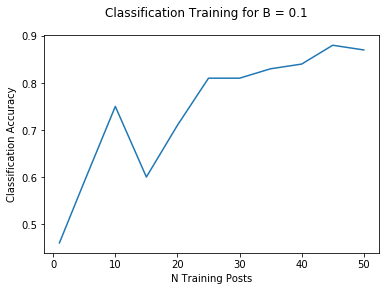

In [54]:
#Plotting of Beta =0.1, Classification Accuracy vs Training Posts. 
ans_array = np.zeros((1,11))
j = 0

n_values = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50];

for i in n_values:
    ans_array[0,j] = Naive_Bayes(0.1, i);
    j = j+1;
    
plt.plot(n_values, ans_array[0,0:]);
plt.ylabel('Classification Accuracy');
plt.xlabel('N Training Posts');
plt.suptitle('Classification Training for B = 0.1');


As we can see after 15 training posts we have almost a steady incline in our Classification accuracy which peaks at 0.88. 

Accuracy 0.86
Accuracy 0.86
Accuracy 0.86
Accuracy 0.87
Accuracy 0.87


C:\Users\Kycool13\Anaconda2\lib\site-packages\ipykernel_launcher.py:64: RuntimeWarning: divide by zero encountered in log
C:\Users\Kycool13\Anaconda2\lib\site-packages\ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log
C:\Users\Kycool13\Anaconda2\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in multiply
C:\Users\Kycool13\Anaconda2\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in multiply
C:\Users\Kycool13\Anaconda2\lib\site-packages\ipykernel_launcher.py:105: RuntimeWarning: invalid value encountered in multiply
C:\Users\Kycool13\Anaconda2\lib\site-packages\ipykernel_launcher.py:106: RuntimeWarning: invalid value encountered in multiply


Accuracy 0.5
Accuracy 0.79
Accuracy 0.65
Accuracy 0.55
Accuracy 0.54


C:\Users\Kycool13\Anaconda2\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


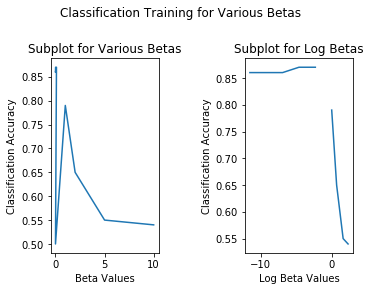

In [55]:
#Plotting of Beta i. Classification Accuracy vs Beta. 
ans_array = np.zeros((1,10))
j = 0

n_values = [.00001, .0001, .001, .01, .1, 0, 1, 2, 5, 10];

for i in n_values:
    ans_array[0,j] = Naive_Bayes(i, 50);
    j = j+1;

plt.suptitle('Classification Training for Various Betas');
    
plt.subplot(121)    
plt.plot(n_values, ans_array[0,0:]);
plt.ylabel('Classification Accuracy');
plt.xlabel('Beta Values');
plt.title('Subplot for Various Betas');

plt.subplot(122)
plt.plot(np.log(n_values), ans_array[0,0:]);
plt.ylabel('Classification Accuracy');
plt.xlabel('Log Beta Values');
plt.title('Subplot for Log Betas');


plt.subplots_adjust(left=0.2, wspace=0.8, top=0.8)

Since the first half of the β values are very small, and closely grouped together let's look at the log values as well to compare. 

As we can see from the Acurracy outputs the classification accurracy is high for the first half of the β values. Yet it drastically drops at β =0, yielding 0.5 accuracy. Then as the β values continue to increase the accuracy continues to decrease. 

### To Do
* Answer all questions from homework assignment
* Try to make both subgraphs larger